# Clustering Unkowing Classes: Adaptative method

## Clustering: Adaptative method function

In [77]:
function [classes, centers] = adaptativeMethod(X, radius)

    n_examples = size(X, 2);
    ind_first = randi(n_examples);
    prototype = X(:, ind_first);
    centers = [ind_first];
    classes = zeros(size(X,1), 1);
    classes(ind_first) = ind_first;

    for i=1:length(X)
        if(~ ismember(i, centers))
            example_vect = X(:,i);
            distances = d_euclid(X(:, centers), example_vect);
            [min_dis, class] = min(distances);
            if (min_dis < radius)
                classes(i) = centers(class);
            else
                centers = [centers, i];
                classes(i) = i;
            end
        end
    end

end

## Generate Data

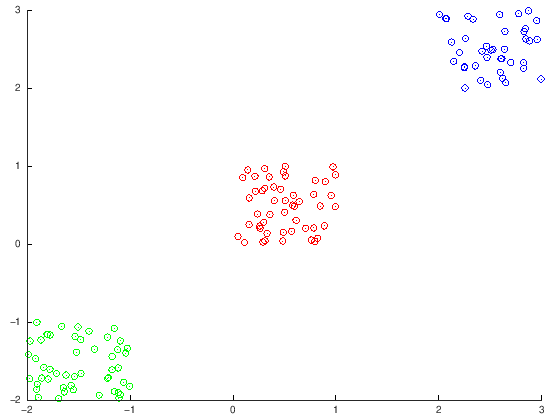

In [2]:
close all; clear all; clc
addpath('pattern')

class1 = rand(2, 50);
class2 = rand(2, 40) + 2;
class3 = rand(2, 50) - 2;
dataY = [ones(1,50), 2 * ones(1,40), 3 * ones(1, 50)];
dataX = [class1, class2, class3];
colors = ['r', 'b', 'g'];

figure; hold on;
for i=1:length(colors)
    ind = find(dataY == i);
    plot(dataX(1,ind), dataX(2,ind), strcat('o', colors(i) ))
end
hold off;

## Sort Data

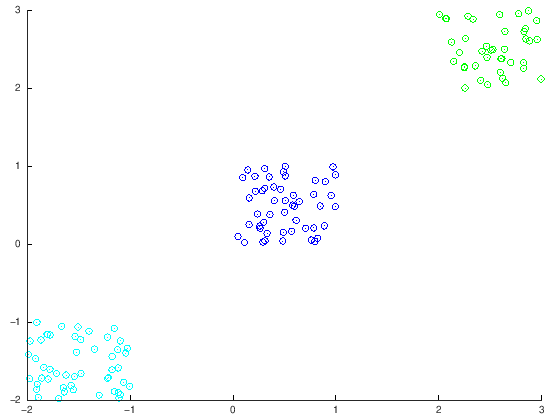

In [78]:
[~, ind] = sort(rand(1, size(dataX, 2)));

X = dataX(:, ind);
y = dataY(:, ind);

figure; hold on;
for i=1:length(colors)
    ind = find(y == i);
    plot(X(1,ind), X(2,ind), strcat('o', colors(i) ))
end
hold off;

## Trainning

In [87]:
radius = 1;
[class, centers] = adaptativeMethod(X, radius);

## Evalue

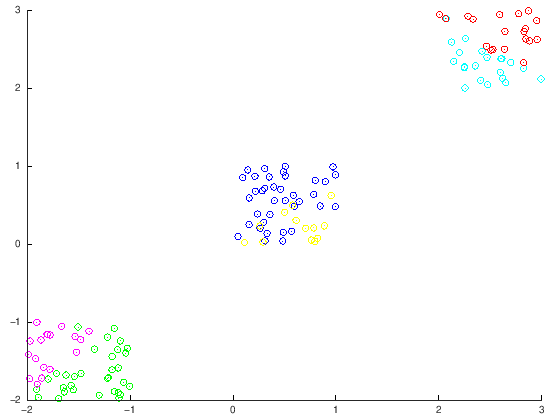

In [89]:
colors = ['b', 'g', 'c', 'r', 'm', 'y', 'k', 'w'];
colors = [ colors, colors, colors];

figure; hold on;
for i=1:length(centers)
    ind = find(class == centers(i));
    plot(X(1,ind), X(2,ind), strcat('o', colors(i) ))
end
hold off;

## Recalcule solution: Centroids

In [118]:
ind = find(class == centers(i));

for i=1:length(centers)
ind = find(class == centers(i));
centroids(:, i) = meanpat(X(:, ind));
end

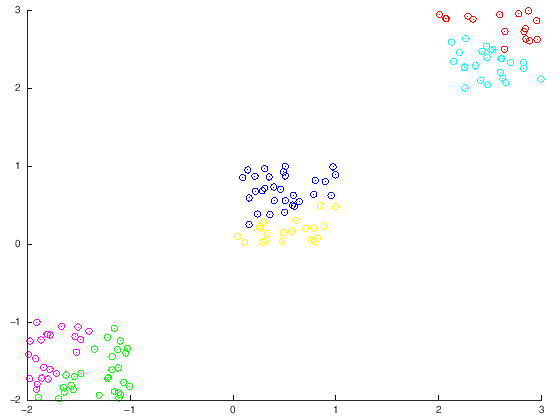

In [117]:
for i=1:length(centroids)
    d(i,:) = d_euclid(X,centroids(:,i));
end

[~,yest]=min(d);

figure,
hold on;
for i=1:length(centers)
    ind = find(yest == i);
    plot(X(1,ind), X(2,ind), strcat('o', colors(i) ))
end
hold off;